# Lab 4 - Principal component analysis

In this lab we will discuss Principle Component Analysis. By the end of this lab you should be able to:

- Compute and visualise the priciple componenets of 1D data set with two variables using basic matrix algebra;
- Load and interogate a 2D sea surface temperature field using xarray;
- Compute the priciple components of a 1D slice of the 2D times series.

First we go through the basics of PCA with the table one of Wilks data.

In [2]:
using DataFrames, CSV, Statistics, LinearAlgebra, Plots

In [3]:
table1 = CSV.File("Wilks_TableA1.csv")
tab1 = DataFrame(table1);

## Basics of PCAs

Consider a data set with $n$ observations of K anomaly (mean = 0) variables 
$$X = \begin{bmatrix}\bf{x}_{1} & \bf{x}_{2} & ... & \bf{x}_{K}
\end{bmatrix}\\
=\begin{bmatrix}x_{11} & x_{12} & ... & x_{1K}\\
x_{21} & x_{22} & ... & x_{2K}\\
... & ... & ... & ...\\
x_{n1} & x_{n2} & ... & x_{nK}
\end{bmatrix}\\
$$

The 1st principle component $\bf{u}_1$ is the linear combination of the K variables that gives the largest variance. For it to be a linear combination we need to find the unit vector ${\bf e}_1$ such that 

$${\bf{u}}_1 ={\bf e}_{1}^{\text{T}}{\bf x}_k = \sum_{k=1}^K e_{k1}{\bf x}_k.$$

Let's use the Ithaca minimum temperature anomaly as $\bf{x}_{1}$ and Canandaigua as $\bf{x}_{2}$ to illustrate how this works.

In this case we have $K=2$, $n= 31$, $x_{11}$ is the Ithica minimum temperature on the 1st of January etc.

First lets compute these and display a scatter plot

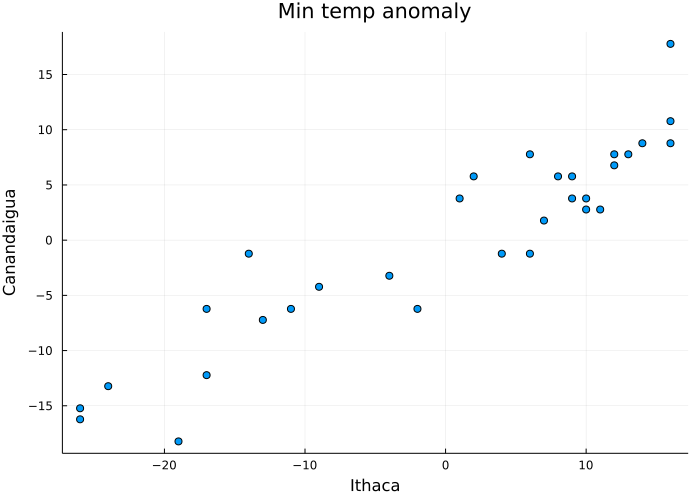

In [6]:
mintemp = tab1[:, "MinTemp_Far"]
find = findall(tab1[:, :Location] .== "Ithaca")
Ithaca = mintemp[find] .- mean(mintemp[find])
find = findall(tab1[:, :Location] .== "Canandaigua")
Can = mintemp[find] .- mean(mintemp[find])

scatter(Ithaca, Can, xlabel = "Ithaca", ylabel = "Canandaigua", label = false, title = "Min temp anomaly", size = (700, 500))

## Covariance matrix and eigenvalues

Hardcode the covariance matrix then calculate the eigenvalues which are the principal components.

In [25]:
n = length(Ithaca)
S = (1/(n-1)) .* [sum(Ithaca.^2) sum(Ithaca.*Can); sum(Ithaca.*Can) sum(Can.^2)]
println(S)
Scov = cov([Ithaca Can])
println(Scov)

[185.46666666666667 110.80000000000001; 110.80000000000001 77.58064516129032]
[185.46666666666667 110.80000000000001; 110.80000000000001 77.58064516129032]


In [26]:
PCs = eigen(Scov)

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
2-element Vector{Float64}:
   8.290184774581327
 254.75712705337565
vectors:
2×2 Matrix{Float64}:
  0.530222  -0.847859
 -0.847859  -0.530222

The first pair of numbers are the eigenvalues ($\lambda$) and remaining array is our eigenvectors (E). Notice that the first and largest eigenvalue corresponds very closely to the variance and the eigenvector corresponds to the vector we found earlier and they are exactly as in Wilks.

So the eigenvectors of the covariance matrix identify the direction of greatest co-variance in our data and the eigenvalues identify the magnitude of that co-variance.

The eigenvvalues are given lowest to highest so for use in julia want to start at the last eigenvalue and the last eigenvector.

I think this means that to look at the first principal component is then

$$
u_{1} = \mathbf{e}_{1}^{T}\mathbf{x} = 0.85x_{1} + 0.53x_{2}
$$

though julia has computed negative eigenvalues.
Not sure why this is but as you can see below that it does not (unsurprisingly) make a difference.

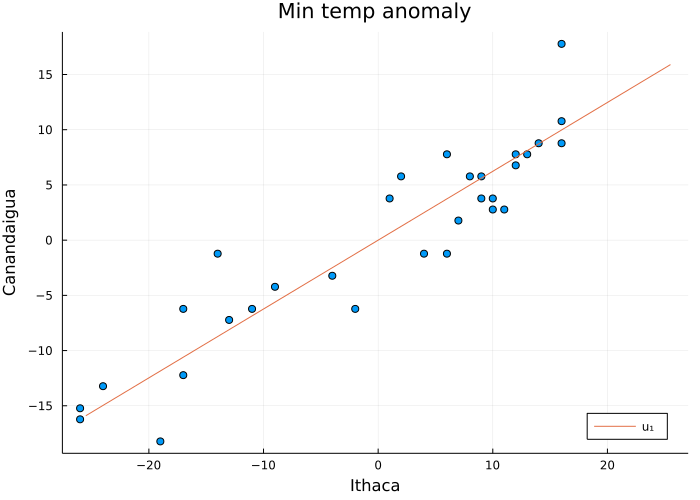

In [30]:
scatter(Ithaca, Can, xlabel = "Ithaca", ylabel = "Canandaigua", label = false, title = "Min temp anomaly", size = (700, 500))
plot!(-0.85.*(-30:30), -0.53.*(-30:30), label = "u₁", legend = :bottomright)

Can see here that by finding the principal component the original data is the recreated using the values over which the data ranges.

I think this is the best intro to this as can clearly see how the principal component captures the behaviour.
Need to get my head around what happens in the higher dimensions though this will no doubt come.